# Naive Bayes Classifier

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

from naive_bayes import GBNaiveBayes

### Load the dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
target_names = iris.target_names

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Dataset Analysis

In [4]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


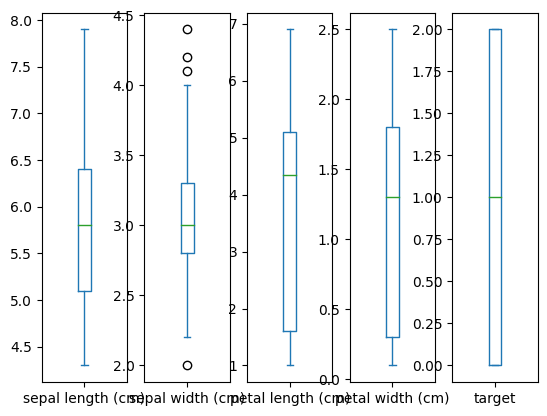

In [7]:
df.describe()
df.plot(kind='box', subplots=True)
plt.show()

### Extract the features and labels

In [8]:
X = df.drop("target", axis=1)
y = df["target"]

### Split the data into train and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes Classifier Model

In [10]:
nb = GBNaiveBayes()
nb.fit(X_train, y_train)

### Testing the model

In [11]:
y_pred = nb.predict(X_test)
accuracy = nb.accuracy(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### Plot the Decision Boundaries

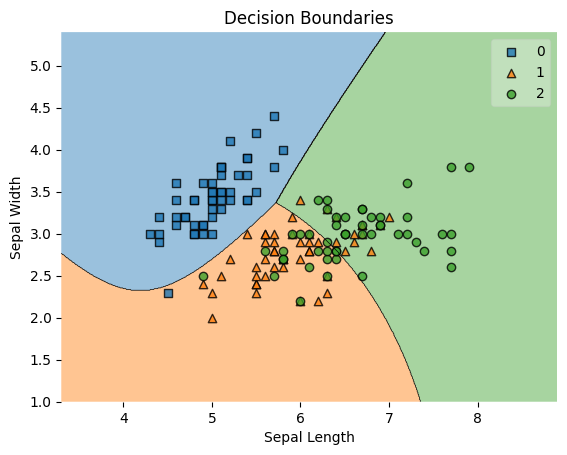

In [12]:
X_filtered = X[["sepal length (cm)","sepal width (cm)"]].values
nb = GBNaiveBayes()
nb.fit(X_filtered, y)

plot_decision_regions(X_filtered, y.values, clf=nb)
plt.title("Decision Boundaries")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()